# 生pythonで線形回帰(多数の特徴)

```
家を売った際の値段を予測する為
広さ(x1)と部屋数(x2)から売値(y)を予測する
```

In [1]:
%matplotlib inline
import numpy as np
from numpy.linalg import pinv
from matplotlib import pyplot as plot

### 予測の悪さを計算する関数

```
X = 広さと部屋数の2次元配列
y = 利益の1次元配列
thetaは y = ax + b のaとb
aとbはこのcompute_cost関数(予測の悪さを計算する関数)のフィードバックを受けて修正し
(学習するたびだんだんと)勝手に調整してくれる
```

In [2]:
def compute_cost(X, y, theta):
    m = y.size
    costs = (X.dot(theta) - y) ** 2
    return costs.sum() / (2.0 * m)

### 最急降下法

cost関数のフィードバックを受けて1次関数のaとbを修正する関数
要は学習を行う関数。
いろいろあるが、この例は最急降下法(gradient descent)というアルゴリズムを利用

alphaは学習率
学習率は高いと学習速度が早いが、発散と呼ばれるいきなり全く的外れな予測しかしないようになる。
学習率は高いと学習速度が遅い

学習率のような自分で調整しないといけないパラメータをハイパーパラメータという

In [3]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        h = X.dot(theta)
        errors = h - y
        delta = X.T.dot(errors)
        theta -= (alpha / m) * delta
        J_history[i] = compute_cost(X, y, theta)
    return (theta, J_history)

### フィーチャースケーリング(feature scaling)と平均正則化(mean normalization)

#### フィーチャースケーリング

複数の特徴を最急降下法で分析する場合、それぞれの値の単位を調整すると収束しやすくなる。
例えば、ctrやimp,clickなど。ctrは1以下の値でclickは大きい数、またimpはそれより100倍近く大きい。
だいたいこれぐらいという値で各特徴を割って同じ範囲にする手法。
だいたい-1以上1以下にする。

#### 平均正則化

だいたい2000の家の広さなら、
サイズに-2000して0へ平均化し、-1000で割ってフューチャースケーリングする。
標準偏差を設定してもいい
ある程度スケーリングしたら大幅に収束しやすくなるので、完全でなくていい。

In [4]:
def normalize_features(X, mu=None, sigma=None):
    m = X.shape[0]
    Xnorm = np.zeros_like(X)
    if mu is None:
        mu = np.mean(X, axis=0)
    if sigma is None:
        sigma = np.std(X, axis=0, ddof=1)
    # don't change the intercept term
    mu[0] = 0.0
    sigma[0] = 1.0
    for i in range(m):
        Xnorm[i, :] = (X[i, :] - mu) / sigma
    return Xnorm, mu, sigma

In [5]:
# データのロード、変数の初期化
data = np.loadtxt('./assets/data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]
m = X.shape[0]
X = np.concatenate((np.ones((m, 1)), X), axis=1)
alpha = 0.01
num_iters = 400
theta = np.zeros(3)

In [6]:
# フィーチャースケーリング(feature scaling)と平均正則化(mean normalization)
Xnorm, mu, sigma = normalize_features(X)

In [7]:
# 最急降下法
[theta, J_history] = gradient_descent(Xnorm, y, theta, alpha, num_iters)

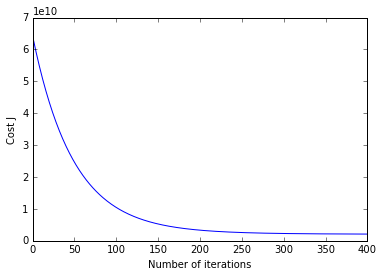

In [8]:
# 収束の可視化
plot.plot(J_history, '-b')
plot.xlabel('Number of iterations')
plot.ylabel('Cost J')
plot.show()

In [9]:
# 予測値の出力
size = 1650
rooms = 3
x = np.array([[1.0, size, rooms]])
x, _, _ = normalize_features(x, mu, sigma)
price = x.dot(theta)[0]
print("広さ{size}で{rooms}部屋の家売値予測値は{price}です。".format(
    size=size,
    rooms=rooms,
    price=price
))

広さ1650で3部屋の家売値予測値は289314.6203377763です。
